In [ ]:
# !pip install neuralprophet[live] # jupyter notebook 용

In [1]:
import os
import numpy as np
import pandas as pd

from neuralprophet import NeuralProphet, set_random_seed 
import neuralprophet

In [4]:
# 난수 생성기가 항상 일정한 값을 출력하게 하기 위해 seed 고정
random_seed = 2022
np.random.seed(random_seed)
set_random_seed(random_seed)

In [5]:
PATH = '/content/drive/MyDrive/Colab Notebooks/traffic forecasting/Project1/traffic forecasting'

In [6]:
train = pd.read_csv(f'{PATH}/data/train.csv')
val = pd.read_csv(f'{PATH}/data/validate.csv')
test = pd.read_csv(f'{PATH}/data/test.csv')
submission = pd.read_csv(f'{PATH}/data/sample_submission.csv')

In [7]:
train = pd.concat([train, val.loc[168:]], ignore_index=True)

In [8]:
336/2

168.0

In [9]:
train

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,67748,16791,33325,19124,42183,63229,13163,35383,73188,100849,84286,26458,15572,10341,139827,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
3443,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,61609,14119,30216,18610,35556,59070,12788,30675,68255,95107,76441,24140,13340,8872,142469,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
3444,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,48336,11534,25710,15651,27467,53787,12019,26317,61169,86434,61136,21076,9317,6392,138816,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
3445,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,8849,4553,33607,8069,18293,9723,16602,38615,8703,17694,47609,58492,37501,12090,5901,3938,100767,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


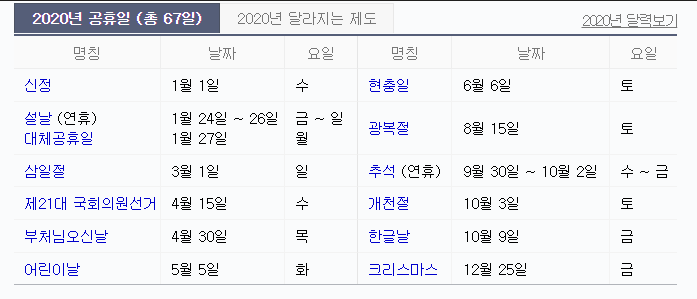

In [13]:
data = pd.DataFrame()
data['ds'] = pd.to_datetime(train['날짜'].astype('str') +'-' + train['시간'].astype('str'),format="%Y%m%d-%H")

In [14]:
train.columns[2:]

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

In [15]:
pred = pd.DataFrame(columns=['ds', 'y'])
pred['ds'] = pd.to_datetime(submission['timestamp'],format="%Y%m%d_%H")

In [16]:
pred

,ds,y
0,2020-05-25 00:00:00,NaN
1,2020-05-25 01:00:00,NaN
2,2020-05-25 02:00:00,NaN
3,2020-05-25 03:00:00,NaN
4,2020-05-25 04:00:00,NaN
...,...,...
163,2020-05-31 19:00:00,NaN
164,2020-05-31 20:00:00,NaN
165,2020-05-31 21:00:00,NaN
166,2020-05-31 22:00:00,NaN


In [18]:
for col in train.columns[2:]:
    data['y'] = train[col]
    m = NeuralProphet()
    m = m.add_country_holidays("KR")
    metrics = m.fit(data, freq="H")
    forecast = m.predict(pred)
    submission[col] = forecast['yhat1']

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.95E-02, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.95E-02, min: 1.01E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.20E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.81it/s, SmoothL1Loss=0.00437, MAE=2.68e+4, RMSE=3.65e+4, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.59E-02, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.51E-01, min: 1.26E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.59E-02, min: 2.31E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.04E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.76it/s, SmoothL1Loss=0.00546, MAE=9.46e+3, RMSE=1.3e+4, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 1.84E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 1.17E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.66E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:28<00:00,  4.62it/s, SmoothL1Loss=0.0117, MAE=1.53e+3, RMSE=2.27e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.95E-02, min: 1.17E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.34E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.91it/s, SmoothL1Loss=0.011, MAE=3.73e+3, RMSE=5.38e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.17E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.47E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.34E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:26<00:00,  4.93it/s, SmoothL1Loss=0.00805, MAE=1.23e+3, RMSE=1.76e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.47E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.36E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.71E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.75E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:26<00:00,  4.97it/s, SmoothL1Loss=0.0106, MAE=1.04e+3, RMSE=1.48e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.01E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.99E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 2.14E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.47E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:26<00:00,  4.95it/s, SmoothL1Loss=0.00531, MAE=1.46e+4, RMSE=1.91e+4, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.21E-02, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.36E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 1.17E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.20E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:26<00:00,  4.95it/s, SmoothL1Loss=0.00592, MAE=675, RMSE=927, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 1.26E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 1.58E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 1.26E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.26E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.84it/s, SmoothL1Loss=0.00851, MAE=2.76e+3, RMSE=3.66e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.40E-01, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.08E-01, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.08E-01, min: 2.14E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.19E-01
Epoch[133/133]: 100%|██████████| 133/133 [00:30<00:00,  4.40it/s, SmoothL1Loss=0.00929, MAE=1.15e+3, RMSE=1.66e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.21E-02, min: 1.99E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.21E-02, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.21E-02, min: 1.71E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.21E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.85it/s, SmoothL1Loss=0.00579, MAE=7.34e+3, RMSE=1e+4, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.04E-02, min: 8.67E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.05E-01, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 1.01E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.39E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.87it/s, SmoothL1Loss=0.00972, MAE=2.52e+3, RMSE=3.55e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.15E-02, min: 1.47E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.40E-02, min: 1.26E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.15E-02, min: 1.36E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.23E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.90it/s, SmoothL1Loss=0.0105, MAE=4.37e+3, RMSE=6.06e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.59E-02, min: 1.99E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 1.26E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.37E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.85it/s, SmoothL1Loss=0.00981, MAE=2.77e+3, RMSE=3.78e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.33E-02, min: 7.46E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.16E-02, min: 8.04E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.51E-02, min: 6.92E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.33E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.87it/s, SmoothL1Loss=0.011, MAE=5.8e+3, RMSE=8.26e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.04E-02, min: 2.14E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.75E-02, min: 1.99E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.04E-02, min: 2.14E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.27E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:26<00:00,  4.95it/s, SmoothL1Loss=0.00566, MAE=6.53e+3, RMSE=8.65e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.39E-02, min: 1.26E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.39E-02, min: 1.84E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.39E-02, min: 1.09E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.39E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.82it/s, SmoothL1Loss=0.00559, MAE=1.27e+3, RMSE=1.6e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.40E-02, min: 1.58E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 1.71E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.66E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.87it/s, SmoothL1Loss=0.00716, MAE=3.91e+3, RMSE=5.25e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.41E-01, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.23E-01, min: 1.17E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.41E-01, min: 1.09E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.35E-01
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.84it/s, SmoothL1Loss=0.00506, MAE=6.58e+3, RMSE=8.85e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 1.36E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 1.26E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.95E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.78it/s, SmoothL1Loss=0.00515, MAE=1.06e+4, RMSE=1.41e+4, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.26E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.36E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.36E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.95E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.85it/s, SmoothL1Loss=0.0108, MAE=1.11e+4, RMSE=1.55e+4, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.59E-02, min: 1.26E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.95E-02, min: 1.01E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.95E-02, min: 1.09E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.83E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.84it/s, SmoothL1Loss=0.00942, MAE=4.45e+3, RMSE=5.71e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.69E-02, min: 1.71E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.21E-02, min: 1.58E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.69E-02, min: 1.47E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.86E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.79it/s, SmoothL1Loss=0.00971, MAE=2.78e+3, RMSE=3.81e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 8.67E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.95E-02, min: 1.47E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.84E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.20E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.84it/s, SmoothL1Loss=0.00976, MAE=1.35e+3, RMSE=1.91e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.15E-02, min: 1.47E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.40E-02, min: 1.36E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.40E-02, min: 1.58E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.31E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:26<00:00,  4.93it/s, SmoothL1Loss=0.00587, MAE=1.39e+4, RMSE=1.95e+4, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.95E-02, min: 8.67E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 8.67E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.20E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:28<00:00,  4.74it/s, SmoothL1Loss=0.0102, MAE=1.13e+3, RMSE=1.6e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.15E-02, min: 1.01E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.40E-02, min: 1.01E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.15E-02, min: 9.35E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.23E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.80it/s, SmoothL1Loss=0.00524, MAE=1.31e+3, RMSE=1.88e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 1.36E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 8.67E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 1.09E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.66E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.78it/s, SmoothL1Loss=0.00737, MAE=4.18e+3, RMSE=5.82e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 1.01E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.69E-02, min: 1.01E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 1.09E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.36E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.86it/s, SmoothL1Loss=0.00654, MAE=1.93e+3, RMSE=2.68e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.20E-02, min: 1.84E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.09E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.71E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.90E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.87it/s, SmoothL1Loss=0.0149, MAE=1.4e+3, RMSE=2.03e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 9.35E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.34E-02, min: 1.84E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 1.84E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.61E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.86it/s, SmoothL1Loss=0.00715, MAE=2.71e+3, RMSE=3.64e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.69E-02, min: 1.36E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.59E-02, min: 5.95E-01


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.01E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.95E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.90it/s, SmoothL1Loss=0.0111, MAE=637, RMSE=859, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.47E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.66E-02, min: 1.36E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.71E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.85E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.86it/s, SmoothL1Loss=0.00707, MAE=1.97e+3, RMSE=2.79e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.58E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.47E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.95E-02, min: 1.47E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.95E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.86it/s, SmoothL1Loss=0.00685, MAE=1.29e+3, RMSE=1.78e+3, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 133


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.21E-02, min: 1.01E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.69E-02, min: 1.47E+00


  0%|          | 0/276 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.21E-02, min: 8.67E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.04E-02
Epoch[133/133]: 100%|██████████| 133/133 [00:27<00:00,  4.87it/s, SmoothL1Loss=0.00635, MAE=2.22e+3, RMSE=3.05e+3, RegLoss=0]


In [19]:
submission

,timestamp,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,80696.344207,17595.482051,1036.774414,6248.325195,911.236267,1080.896729,31758.647607,1220.706543,4688.805176,1565.145508,12730.974266,1920.366211,8482.409180,3354.708496,7028.774414,9893.904853,3707.601318,7510.740723,21876.718130,14550.581189,12702.148569,4192.379883,1586.669678,1432.169922,27904.189636,591.978149,3364.779785,-1246.317383,3913.253418,1741.145874,4751.788574,-75.982529,2792.392090,1889.513428,2807.933838
1,20200525_1,63774.381913,14475.625575,849.681091,5372.352051,711.395020,893.784851,24984.292891,982.488953,4151.231934,1315.243042,9857.495836,1303.444458,7007.950195,2853.036133,5474.871094,7995.000600,3393.876953,7084.516113,17459.675395,10670.043869,10485.892792,3072.484131,955.902222,1298.937622,21547.397102,440.989471,2966.192383,-2208.495605,2847.708008,1453.586426,4000.058105,-199.597687,2551.550781,1729.902466,2508.950684
2,20200525_2,58673.892245,15220.282957,976.234497,5248.081055,901.932068,986.526184,21177.693267,962.444397,4057.000244,1567.470337,9803.964038,1365.504272,6657.584961,2935.854980,5260.708008,7825.217755,3166.005371,7550.031250,15181.659547,9093.219436,10852.379155,2452.363525,821.404419,1469.868408,17359.481981,777.845154,2952.015625,-2912.244141,2201.832275,1324.457153,4251.897461,-53.604603,3331.975098,2056.791504,3077.570557
3,20200525_3,51952.163454,14646.910653,724.162903,5037.853027,560.955383,857.701843,18433.049092,862.710449,3619.107178,1727.868042,8534.120322,1303.863281,6677.658691,2624.927979,4759.035645,6811.495250,2938.161377,7616.580566,14760.445177,7691.075998,9605.707548,1939.354370,519.926941,1261.306763,12819.412308,550.477295,2497.093994,-3923.879639,1530.791504,1167.112793,4148.466309,-54.258816,3089.559326,1817.684814,2845.315918
4,20200525_4,68023.000366,18473.690674,791.024353,5618.632324,434.580017,824.648071,27616.234096,1036.471313,3647.277832,1885.089722,9012.993325,1833.433594,7649.987793,2787.385498,5106.033691,9354.465134,3911.286377,9684.869141,18435.436052,15561.585895,10348.542592,1796.955688,412.535645,1490.033569,27652.617001,254.422638,3318.193115,-92.386475,3269.731934,1235.568604,4332.688965,-145.845367,3096.981934,2021.942749,3295.913574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,273751.941018,81713.395953,7532.769043,22490.873047,7971.703613,5916.449219,116216.900933,5442.173828,17020.402344,6940.904785,57488.727710,11956.816406,25315.564453,15089.297852,31347.339844,47678.740431,11132.860352,27150.910156,59356.579176,82018.504491,62594.444346,17712.781250,11125.011719,7453.788086,136319.164467,6082.341797,14038.914062,21338.005859,16662.828125,5949.363281,18876.925781,2470.009521,16603.261719,9871.288086,17455.203125
164,20200531_20,235674.646113,62146.899201,4842.192383,16726.730469,5079.833496,3836.758545,98779.122594,4118.823242,12883.682617,5281.770996,44655.249115,8754.783203,20788.933594,11272.730469,23605.562500,37669.770471,9483.489258,20918.105469,52114.600421,65293.738098,46345.099818,14468.196289,7408.390625,5077.854492,117417.974517,3820.985107,11627.583984,14964.139648,14324.352539,4783.356445,14313.627930,1232.099365,11699.373047,6787.940918,11961.871094
165,20200531_21,210511.101803,48752.710253,3365.888672,12883.922852,3659.038086,2673.349365,83738.323476,3280.837402,10114.744141,4143.186523,35546.047323,6583.337891,17339.386719,8503.537109,18020.599609,29730.492373,8107.532715,16773.457031,45565.368746,51522.183686,35094.406055,11244.525391,5108.174805,3816.865723,100985.516788,2533.332031,9672.499023,10633.921875,12597.319336,3760.273926,11440.795898,578.512329,8654.198242,5258.846191,8698.801758
166,20200531_22,174537.197292,38379.606143,2499.252197,10227.381836,2916.578857,2101.663818,65006.074232,2610.129883,8054.653809,3211.77612

In [22]:
submission.columns[1:]

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

In [23]:
for col in submission.columns[1:]:
    submission.loc[submission[col] < 0, col] = 0# 마이너스 값 0으로 변경

In [24]:
submission

,timestamp,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,80696.344207,17595.482051,1036.774414,6248.325195,911.236267,1080.896729,31758.647607,1220.706543,4688.805176,1565.145508,12730.974266,1920.366211,8482.409180,3354.708496,7028.774414,9893.904853,3707.601318,7510.740723,21876.718130,14550.581189,12702.148569,4192.379883,1586.669678,1432.169922,27904.189636,591.978149,3364.779785,0.000000,3913.253418,1741.145874,4751.788574,0.000000,2792.392090,1889.513428,2807.933838
1,20200525_1,63774.381913,14475.625575,849.681091,5372.352051,711.395020,893.784851,24984.292891,982.488953,4151.231934,1315.243042,9857.495836,1303.444458,7007.950195,2853.036133,5474.871094,7995.000600,3393.876953,7084.516113,17459.675395,10670.043869,10485.892792,3072.484131,955.902222,1298.937622,21547.397102,440.989471,2966.192383,0.000000,2847.708008,1453.586426,4000.058105,0.000000,2551.550781,1729.902466,2508.950684
2,20200525_2,58673.892245,15220.282957,976.234497,5248.081055,901.932068,986.526184,21177.693267,962.444397,4057.000244,1567.470337,9803.964038,1365.504272,6657.584961,2935.854980,5260.708008,7825.217755,3166.005371,7550.031250,15181.659547,9093.219436,10852.379155,2452.363525,821.404419,1469.868408,17359.481981,777.845154,2952.015625,0.000000,2201.832275,1324.457153,4251.897461,0.000000,3331.975098,2056.791504,3077.570557
3,20200525_3,51952.163454,14646.910653,724.162903,5037.853027,560.955383,857.701843,18433.049092,862.710449,3619.107178,1727.868042,8534.120322,1303.863281,6677.658691,2624.927979,4759.035645,6811.495250,2938.161377,7616.580566,14760.445177,7691.075998,9605.707548,1939.354370,519.926941,1261.306763,12819.412308,550.477295,2497.093994,0.000000,1530.791504,1167.112793,4148.466309,0.000000,3089.559326,1817.684814,2845.315918
4,20200525_4,68023.000366,18473.690674,791.024353,5618.632324,434.580017,824.648071,27616.234096,1036.471313,3647.277832,1885.089722,9012.993325,1833.433594,7649.987793,2787.385498,5106.033691,9354.465134,3911.286377,9684.869141,18435.436052,15561.585895,10348.542592,1796.955688,412.535645,1490.033569,27652.617001,254.422638,3318.193115,0.000000,3269.731934,1235.568604,4332.688965,0.000000,3096.981934,2021.942749,3295.913574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,273751.941018,81713.395953,7532.769043,22490.873047,7971.703613,5916.449219,116216.900933,5442.173828,17020.402344,6940.904785,57488.727710,11956.816406,25315.564453,15089.297852,31347.339844,47678.740431,11132.860352,27150.910156,59356.579176,82018.504491,62594.444346,17712.781250,11125.011719,7453.788086,136319.164467,6082.341797,14038.914062,21338.005859,16662.828125,5949.363281,18876.925781,2470.009521,16603.261719,9871.288086,17455.203125
164,20200531_20,235674.646113,62146.899201,4842.192383,16726.730469,5079.833496,3836.758545,98779.122594,4118.823242,12883.682617,5281.770996,44655.249115,8754.783203,20788.933594,11272.730469,23605.562500,37669.770471,9483.489258,20918.105469,52114.600421,65293.738098,46345.099818,14468.196289,7408.390625,5077.854492,117417.974517,3820.985107,11627.583984,14964.139648,14324.352539,4783.356445,14313.627930,1232.099365,11699.373047,6787.940918,11961.871094
165,20200531_21,210511.101803,48752.710253,3365.888672,12883.922852,3659.038086,2673.349365,83738.323476,3280.837402,10114.744141,4143.186523,35546.047323,6583.337891,17339.386719,8503.537109,18020.599609,29730.492373,8107.532715,16773.457031,45565.368746,51522.183686,35094.406055,11244.525391,5108.174805,3816.865723,100985.516788,2533.332031,9672.499023,10633.921875,12597.319336,3760.273926,11440.795898,578.512329,8654.198242,5258.846191,8698.801758
166,20200531_22,174537.197292,38379.606143,2499.252197,10227.381836,2916.578857,2101.663818,65006.074232,2610.129883,8054.653809,3211.776123,27738.821902,4608.233398,139

In [25]:
submission.to_csv('prediction.csv', index=False)